<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/Denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
#Normalise [0,1]
(xtrain, _),(xtest, _) = fashion_mnist.load_data()
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [10]:
#NOISE DATA

import numpy as np
xtrain_noise = xtrain+0.2*np.random.normal(0,1,size=xtrain.shape)
xtest_noise = xtest+0.2*np.random.normal(0,1,size=xtest.shape)

#Cliping the data
xtrain_noise = tf.clip_by_value(xtrain_noise,0.,1.)
xtest_noise = tf.clip_by_value(xtest_noise,0.,1.)

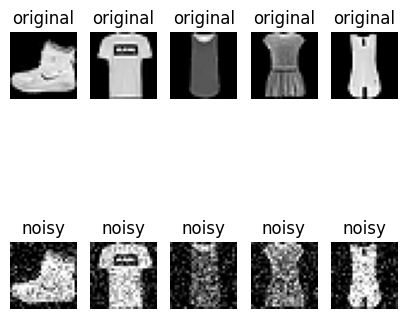

In [11]:
#Visualise
plt.figure(figsize=(5,5))
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title("original")
  plt.axis('off')
  plt.subplot(2,5,i+5+1)
  plt.imshow(xtrain_noise[i],cmap='gray')
  plt.title("noisy")
  plt.axis('off')

In [12]:
model = keras.Sequential(
    [
        keras.layers.Input((28,28)),
        keras.layers.Flatten(),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(64,activation='relu'),
        Dense(128,activation='relu'),
        Dense(784,activation='sigmoid'),
        keras.layers.Reshape((28,28))

    ]
)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [14]:
model.fit(xtrain_noise,xtrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3230
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2967
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2911
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2878
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2859
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2846
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2836
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2827
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2820
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2814
Epoch 11/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2809
Epoch 12/20
1875/1875 [==============================] - 12s 6ms/step - lo

In [15]:
predict = model.predict(xtest)

313/313 [==============================] - 2s 6ms/step


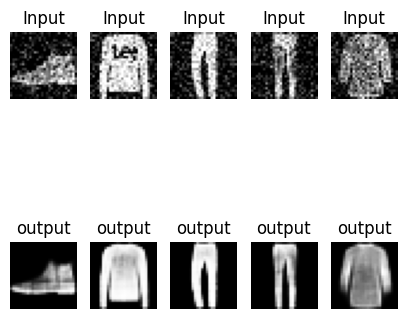

In [16]:
#Visualise
plt.figure(figsize=(5,5))
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(xtest_noise[i],cmap='gray')
  plt.title("Input")
  plt.axis('off')
  plt.subplot(2,5,i+5+1)
  plt.imshow(predict[i],cmap='gray')
  plt.title("output")
  plt.axis('off')